In [366]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score,accuracy_score
warnings.filterwarnings("ignore")

In [367]:
client_credentials_manager = SpotifyClientCredentials(client_id='edf01aac33304516a581c96cb63bd437', client_secret='a7b711f88a604200b660d2a47930133d') 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [381]:
def make_table (uri,genre):
    uri = uri
    username = uri.split(':')[2]
    playlist_id = uri.split(':')[4]
    results = sp.user_playlist(username, playlist_id)
    all_data = list(results.values())
    tracks_play = [list(x.values()) for x in list(all_data[12]["items"])]
    uri_ = [x[4]['uri'].split(':')[2] for x in tracks_play]
    data = pd.DataFrame(sp.audio_features(uri_))
    data['song_name'] = [x[4]['name'] for x in tracks_play]
    data['popularity'] = [x[4]['popularity'] for x in tracks_play]
    data['explicit'] = [0 if x[4]['explicit']==False else 1 for x in tracks_play]
    data.drop(['type','uri','type','analysis_url','duration_ms','mode','key','track_href','id'],axis=1,inplace=True)
    data.set_index('song_name',inplace=True)
    data['genre'] = [genre]*data.shape[0]
    return data

In [123]:
client_credentials_manager = SpotifyClientCredentials(client_id='edf01aac33304516a581c96cb63bd437', client_secret='a7b711f88a604200b660d2a47930133d') 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 
playlist = sp.user_playlist("Spotify", "37i9dQZF1DWUH2AzNQzWua") 
songs = playlist["tracks"]["items"] 
ids = [] 
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"])
features = sp.audio_features(ids) 
df = pd.DataFrame(features)

['3JvrhDOgAt6p7K8mDyZwRd', '0aOluBqXYd0rFSCsgDyAWX', '0W4Kpfp1w2xkY3PrV714B7', '1XpYodsD36XN7ygcdF7mJJ', '6GmUVqe73u5YRfUUynZK6I', '7q0aQpiLv5tIsupcgQ3Ny4', '5fVZC9GiM4e8vu99W0Xf6J', '78TTtXnFQPzwqlbtbwqN0y', '3d9DChrdc6BOeFsbrZ3Is0', '6fxVffaTuwjgEk5h9QyRjy', '4JehYebiI9JE8sR8MisGVb', '6FlAGda9qkDhTU7ctFM4uG', '2uhEKg8kIzpdvz4gyy6x8W', '7IQ7Tk8D6fFAgl6aL7u5ia', '11bD1JtSjlIgKgZG2134DZ', '1EzrEOXmMH3G43AXT1y7pA', '7C6njUzhBb6fIpXzBYWg1n', '2jppsxdHlNHz9eK0QyYlTq', '38xWaVFKaxZlMFvzNff2aW', '2im8Pxe6JuPf6dhpxhl2nX', '7wZUrN8oemZfsEd1CGkbXE', '3a2tuvXCHbW5nuUckuHkKT', '7nnWIPM5hwE3DaUBkvOIpy', '7w5cxTEzp1rfV3KCy0Bd5N', '2aibwv5hGXSgw7Yru8IYTO', '3AJwUDP919kvQ9QcozQPxg', '3ZffCQKLFLUvYM59XKLbVm', '5qLOOZwYQ9jygUwEghxxWX', '5ULRlgiSPSKTaJN1vU9yso', '2VFf8YhTnmhWF108o9UEr7', '4tYokojnBEp5pBWO7wTRPA', '4bgCdwNpbU3sCJ3mupBW8S', '2jdAk8ATWIL3dwT47XpRfu', '3pLTOP0G0etiWUknFoRpsr', '2WZyfujzMweFLnozyUJBkW', '1Slwb6dOYkBlWal1PGtnNg', '5rwq6R0Uq0BngM3rdmCeNg', '38YgZVHPWOWsKrsCXz6JyP', '7L605WhF5E

In [132]:
features = [x for x in my_playlist.describe().columns if x!='mode']

In [382]:
def make_table (uri):
    uri = uri
    username = uri.split(':')[2]
    print (username)
    playlist_id = uri.split(':')[4]
    results = sp.user_playlist(username, playlist_id)
    all_data = list(results.values())
    tracks_play = [list(x.values()) for x in list(all_data[12]["items"])]
    uri_ = [x[4]['uri'].split(':')[2] for x in tracks_play]
    data = pd.DataFrame(sp.audio_features(uri_))
    data['song_name'] = [x[4]['name'] for x in tracks_play]
    data['popularity'] = [x[4]['popularity'] for x in tracks_play]
    data['explicit'] = [0 if x[4]['explicit']==False else 1 for x in tracks_play]
    data.drop(['type','uri','type','analysis_url','duration_ms','mode','key','track_href','id'],axis=1,inplace=True)
    data.set_index('song_name',inplace=True)
    return data

bassim = make_table('spotify:user:22jsfsrf3rxedkj3meohyummy:playlist:45nPGCRJ94S37nvh10dx3x')
discover = make_table('spotify:user:22jsfsrf3rxedkj3meohyummy:playlist:7kDhxtWngRnyWwNlTnkwVh')

22jsfsrf3rxedkj3meohyummy
22jsfsrf3rxedkj3meohyummy


In [377]:
test = make_table('spotify:user:spotify:playlist:37i9dQZF1DX8C585qnMYHP')

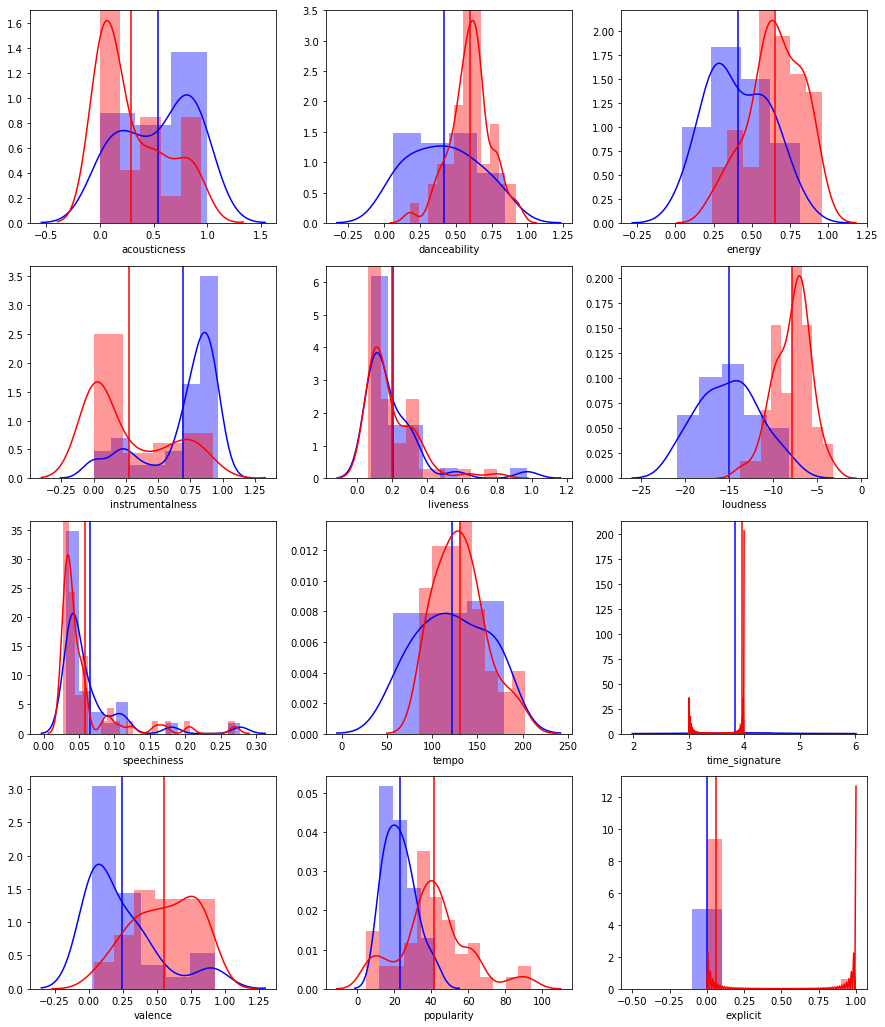

In [379]:
features = bassim.columns
f, ax = plt.subplots(4,3)
f.set_figheight(18)
f.set_figwidth(15)
list_1 = [0]*3 + [1]*3  + [2]*3 + [3]*3 
list_2 = [0,1,2]*4
for c,z in zip(['blue','red'],[test,bassim]):
    for x,y,feature in zip(list_1,list_2,features):
        sns.distplot(z[feature],ax=ax[x,y],color=c)
        ax[x,y].axvline(z[feature].mean(),c=c)

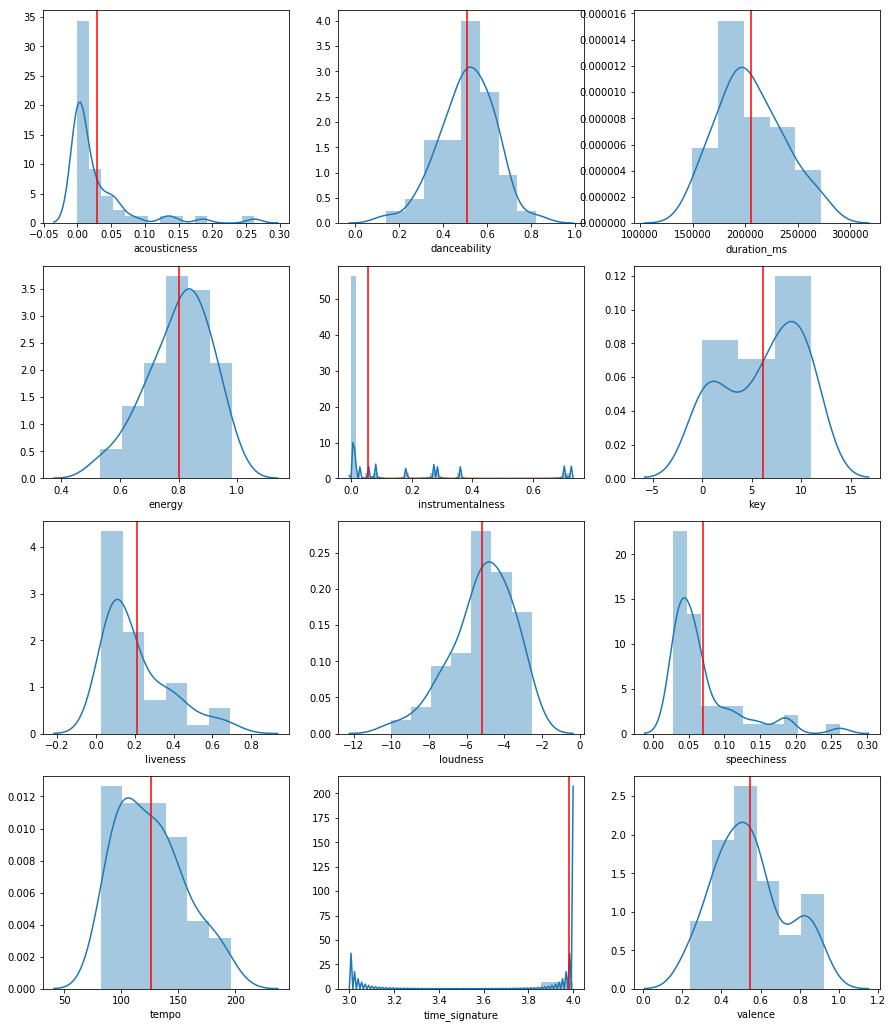

In [20]:
f, ax = plt.subplots(4,3)
f.set_figheight(18)
f.set_figwidth(15)
list_1 = [0]*3 + [1]*3  + [2]*3 + [3]*3 
list_2 = [0,1,2]*4
for x,y,feature in zip(list_1,list_2,features):
    sns.distplot(df[feature],ax=ax[x,y])
    ax[x,y].axvline(df[feature].mean(),c='r')